<a target="_blank" href="https://colab.research.google.com/github/lucaase/LFP-analysis-HS/blob/main/Course-Notebook.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank" href="https://www.kaggle.com/kernels/welcome?src=https://github.com/lucaase/LFP-analysis-HS/blob/main/Course-Notebook.ipynb">
  <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"/>
</a>

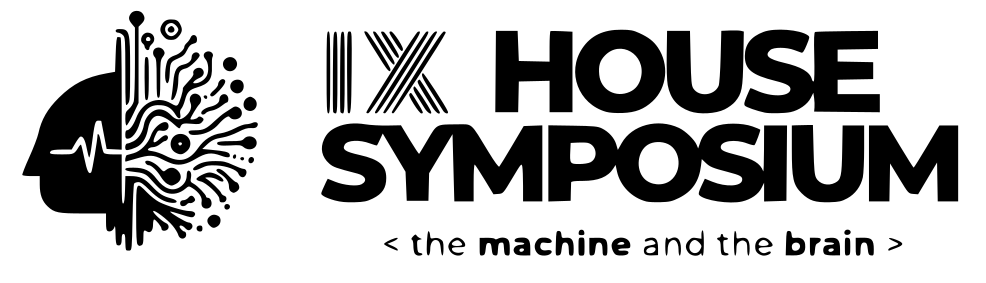

# **Decodificando o cérebro por meio do aprendizado de máquina**

Bem vindos à nona edição do House Symposium do Instituto do Cérebro! Como parte do evento, esse workshop oferecerá teoria e prática em técnicas de aprendizado de máquina para análise de dados eletrofisiológicos neurais. Os participantes serão apresentados a métodos de redução de dimensionalidade, clusterização e classificação, aplicados na identificação de padrões latentes em dados de alta dimensionalidade.

**Instituto do Cérebro, Universidade Federal do Rio Grande do Norte**

**Tutores**: Lucas CS Tavares (lucastavares@neuro.ufrn.br), Rodrigo MM Santiago (rsantiago@neuro.ufrn.br)

___
# Objetivos do Workshop

*Tempo estimado do tutorial: 2 horas*

Neste tutorial interativo, nossos principais objetivos são capacitar os participantes a explorar e interpretar dados neurais e comportamentais utilizando métodos de aprendizado de máquina. Ao longo da sessão, os participantes praticarão as seguintes áreas:

- **Carregamento e Visualização de Dados**:
    - Aprenda a carregar e visualizar dados neurais (LFPs e spikes) e comportamentais (contínuos e categóricos, binários e multiclasse).
    - Realize uma análise estatística inicial, avaliando o balanceamento de classes, dispersão e medidas centrais nos dados.

- **Redução de Dimensionalidade**:
    - Descubra técnicas como PCA, UMAP e CEBRA, entendendo como essas ferramentas transformam dados em representações compactas.
    - Explore a aplicação de aprendizado supervisionado e não supervisionado, incluindo abordagens de clustering.

- **Regressão**:
    - Aprofunde-se em modelos como Regressão Linear, SVMs e Redes Neurais para predizer variáveis contínuas.
    - Veja exemplos práticos, como prever posição a partir de sinais do hipocampo.
    - Entenda o impacto do pré-processamento e da limpeza de dados nas predições.

- **Classificação**:
    - Explore métodos como Regressão Logística, KNN e Redes Neurais para classificar dados categóricos.
    - Trabalhe com dados do projeto IBL, identificando fatores de confusão e avaliando a seleção de dados.

- **Avaliação de Modelos**:
    - Identifique armadilhas comuns em modelos de aprendizado de máquina.
    - Entenda as métricas de desempenho mais utilizadas e saiba quando usar cada uma.
    - Aprenda a interpretar trade-offs de desempenho e visualizar resultados através de gráficos.

<br>

**Créditos:**

- O formato deste notebook foi inspirado nos exemplos da [Neuromatch Academy](https://academy.neuromatch.io).

# Carregamento e Visualização de Dados

Nesta seção, vamos explorar o carregamento de dados neurais e comportamentais, seguido pela visualização inicial para compreender as características principais. Usaremos dados sintéticos que simulam padrões comuns em experimentos neurocientíficos, incluindo potenciais de ação (spikes), sinais contínuos (comportamentos locomotores) e variáveis discretas (estados comportamentais).

## Carregando Dados

Começaremos carregando dois tipos principais de dados:

1. **Dados Neurais (Spikes e LFP):**
   - Potenciais de ação registrados de múltiplos neurônios.
   - Sinais de campo local (LFP) representando oscilações neurais.

2. **Dados Comportamentais:**
   - Variável contínua: velocidade do animal ao longo do tempo.
   - Variáveis discretas: estados comportamentais como "parado" (0), "caminhando" (1) e "correndo" (2).

### Simulando Dados
Vamos gerar dados sintéticos para cada tipo:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configurações gerais
np.random.seed(42)
time = np.linspace(0, 10, 1000)  # 10 segundos com 1000 amostras

# Dados neurais
spikes = np.random.poisson(0.2, size=(125, len(time)))  # 125 neurônios
lfp = np.sin(2 * np.pi * 8 * time) + 0.5 * np.random.randn(len(time))  # 8 Hz oscilação + ruído

# Dados comportamentais
velocity = np.abs(3 * np.sin(2 * np.pi * 0.2 * time)) + np.random.rand(len(time))  # Velocidade contínua
states = np.random.choice([0, 1, 2], size=len(time), p=[0.5, 0.3, 0.2])  # Estados discretos

# Criar um DataFrame para consolidar os dados
data = pd.DataFrame({
    'Time': time,
    'Velocity': velocity,
    'State': states,
    'LFP': lfp
})

## Visualização de Dados
Agora, vamos visualizar os dados para identificar padrões e possíveis artefatos.

### Visualizando Spikes
Os spikes são eventos binários (0 ou 1) associados à atividade dos neurônios ao longo do tempo. Vamos construir um gráfico raster para exibir sua distribuição.

In [ ]:
# Gráfico Raster
plt.figure(figsize=(12, 6))
for neuron_id, spike_train in enumerate(spikes[:20]):  # Apenas os 20 primeiros neurônios
    spike_times = time[spike_train > 0]
    plt.vlines(spike_times, neuron_id, neuron_id + 1, color='black')

plt.xlabel('Tempo (s)')
plt.ylabel('Neurônio')
plt.title('Gráfico Raster dos Spikes')
plt.show()


### Visualizando Sinais de LFP

Os sinais de campo local (LFP) fornecem informações contínuas sobre as oscilações neurais. Vamos traçar o LFP em conjunto com eventos discretos para facilitar a análise.

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time, lfp, label='LFP', color='blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Sinal de Campo Local (LFP)')
plt.legend()
plt.show()

### Visualizando Dados Comportamentais

Vamos criar gráficos para variáveis contínuas (velocidade) e discretas (estados comportamentais).

In [ ]:
# Velocidade (contínua)
plt.figure(figsize=(12, 6))
plt.plot(time, velocity, label='Velocidade', color='green')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (cm/s)')
plt.title('Velocidade do Animal ao Longo do Tempo')
plt.legend()
plt.show()

# Estados (discretos)
plt.figure(figsize=(12, 6))
plt.scatter(time, states, c=states, cmap='viridis', s=10)
plt.xlabel('Tempo (s)')
plt.ylabel('Estado Comportamental')
plt.title('Estados Comportamentais (0: Parado, 1: Caminhando, 2: Correndo)')
plt.show()

## Explorando Distribuições Estatísticas

Antes de avançar, é importante verificar propriedades estatísticas, como equilíbrio entre classes e variabilidade nos dados.

In [ ]:
# Análise dos Estados Comportamentais

state_counts = data['State'].value_counts(normalize=True)
print('Distribuição dos Estados Comportamentais:')
print(state_counts)

# Plotagem da distribuição
state_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribuição de Estados Comportamentais')
plt.xlabel('Estado')
plt.ylabel('Proporção')
plt.show()

In [ ]:
# Estatísticas da Velocidade

print(data['Velocity'].describe())

plt.figure(figsize=(12, 6))
plt.hist(data['Velocity'], bins=30, color='purple', alpha=0.7)
plt.title('Distribuição da Velocidade')
plt.xlabel('Velocidade (cm/s)')
plt.ylabel('Frequência')
plt.show()

# Redução de Dimensionalidade e Padrões Latentes

A redução de dimensionalidade é fundamental para explorar padrões latentes em dados de alta dimensionalidade. Métodos como **PCA**, **UMAP** e **CEBRA** são amplamente utilizados para simplificar e interpretar dados neurais.

### Métodos:
- **PCA**: Reduz a dimensionalidade destacando componentes principais que explicam a maior variabilidade nos dados.
- **UMAP**: Projeta dados complexos em dimensões mais baixas, mantendo relações locais entre pontos.
- **CEBRA**: Integra dados supervisionados para identificar padrões latentes que refletem comportamentos ou condições específicas.

### Exploração:
Vamos aplicar esses métodos para:
- Comparar aprendizado supervisionado e não supervisionado.
- Explorar agrupamentos e trajetórias em dados neurais de múltiplas regiões.

---

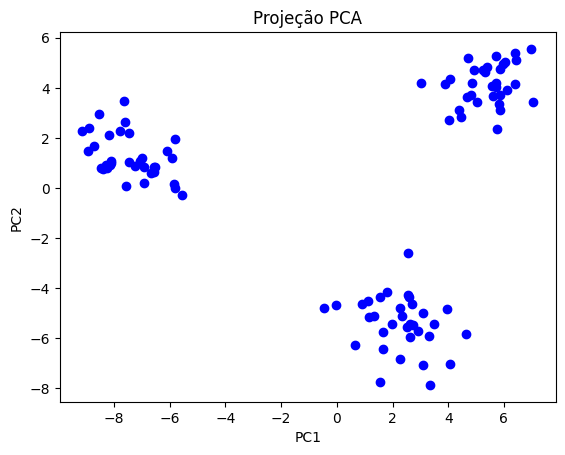

In [4]:
# Exemplo de PCA em dados simulados
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Gera dados simulados
data, _ = make_blobs(n_samples=100, n_features=3)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Visualiza dados reduzidos
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue')
plt.title('Projeção PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

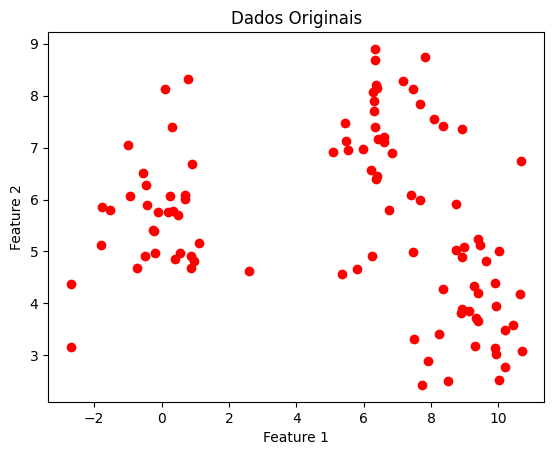

In [5]:
# Show the original data
plt.scatter(data[:, 0], data[:, 1], c='red')
plt.title('Dados Originais')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Regressão: Predição e Impacto do Pré-Processamento

A regressão é uma abordagem poderosa para prever variáveis contínuas a partir de dados neurais. Métodos como Regressão Linear, SVMs e Redes Neurais são particularmente úteis em aplicações com sinais do hipocampo.

### Métodos:
- **Regressão Linear**: Simplicidade e interpretabilidade para relações lineares.
- **SVMs**: Modelos robustos para previsões em espaços de alta dimensionalidade.
- **Redes Neurais**: Flexibilidade para capturar relações complexas nos dados.

### Aplicação:
- Predição da posição de um animal a partir de sinais neurais.
- Análise do impacto da limpeza e do pré-processamento de dados no desempenho dos modelos.

---

In [ ]:
# Exemplo de classificação com SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dados de exemplo
X, y = make_blobs(n_samples=100, centers=2, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Avaliação
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy:.2f}')

# Classificação: Abordagens e Desafios em Dados Reais

A classificação permite separar dados categóricos em grupos distintos. Modelos como Regressão Logística, KNN e Redes Neurais são essenciais para explorar dados comportamentais.

### Métodos:
- **Regressão Logística**: Uma abordagem eficiente para tarefas binárias e multiclasse.
- **KNN**: Um método intuitivo baseado na proximidade dos dados no espaço.
- **Redes Neurais**: Capacidade de identificar padrões em dados complexos.

### Aplicação:
- Análise de dados do projeto IBL para classificar comportamentos.
- Exploração dos impactos de vieses e seleção de dados nos resultados.

---

In [ ]:
# Exemplo de classificação com SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dados de exemplo
X, y = make_blobs(n_samples=100, centers=2, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Avaliação
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy:.2f}')

 Avaliação de Modelos: Métricas, Armadilhas e Trade-offs

A avaliação adequada dos modelos de aprendizado de máquina é crucial para garantir a confiabilidade das análises. Vamos explorar métricas de desempenho, armadilhas comuns e como equilibrar trade-offs.

### Aspectos:
- **Métricas de desempenho**: Como acurácia, F1-score, AUC e erros absolutos médios são usados.
- **Armadilhas comuns**: Overfitting, seleção de variáveis inadequadas e dados enviesados.
- **Trade-offs e visualização**: Gráficos de curvas ROC, precisão-revocação e análise de custo-benefício entre complexidade e desempenho.

### Exploração:
- Identifique os limites dos modelos aplicados e otimize seu uso para estudos práticos.

In [ ]:
# Exemplo de validação cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

print(f'Média da acurácia: {scores.mean():.2f} ± {scores.std():.2f}')

# Sumário e Conclusões

Neste workshop, exploramos técnicas essenciais para análise de dados neurais, incluindo carregamento, visualização, redução de dimensionalidade, regressão, classificação e avaliação de modelos. Com isso, cobrimos um pipeline completo para extrair informações valiosas de dados complexos.

## Principais Aprendizados:

1. **Carregamento e Visualização de Dados:**
   - Aprendemos a carregar, visualizar e interpretar dados neurais e comportamentais, identificando artefatos e explorando distribuições estatísticas.

2. **Redução de Dimensionalidade:**
   - Aplicamos métodos como PCA, UMAP e CEBRA para simplificar dados de alta dimensionalidade, explorando padrões latentes e trajetórias neurais.

3. **Regressão Aplicada a Dados Neurais:**
   - Utilizamos modelos como Regressão Linear, SVMs e Redes Neurais para prever variáveis contínuas, demonstrando a importância do pré-processamento para melhorar previsões.

4. **Classificação de Dados Comportamentais:**
   - Exploramos algoritmos como Regressão Logística, KNN e Redes Neurais para classificar comportamentos, abordando a influência de viés e seleção de dados.

5. **Avaliação de Modelos:**
   - Investigamos métricas de desempenho, como acurácia e F1-score, e discutimos armadilhas comuns em modelos de aprendizado de máquina, além de trade-offs entre complexidade e desempenho.

### Próximos Passos:
- Experimente aplicar essas técnicas em novos conjuntos de dados, teste métodos adicionais de aprendizado de máquina e refine a interpretação dos modelos para contextos específicos.


---
# Material Complementar

## Databases:

Explore dados publicamente disponíveis para análise e pesquisa em neurociência:

- [CRCNS](crcns.org)
- [IBL's Brainwide Map](https://www.internationalbrainlab.com/data)
- [Zenodo](https://zenodo.org)
- [figshare](figshare.com)
- [Dryad](https://datadryad.org/stash)
- [Google Dataset Search](https://datasetsearch.research.google.com)

## Recursos da comunidade aberta na neurociência:

- [List of Neuroscience Databases](en.wikipedia.org/wiki/List_of_neuroscience_databases)
- [NeuralEnsemble](http://neuralensemble.org)
- [Open Computational Neuroscience Resources](https://github.com/asoplata/open-computational-neuroscience-resources)

## Leituras complementares:

